# **AP157 Module C Lab Assignment**

## Module C1: Networks

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: The sample social network used is taken from https://nauczanki.wordpress.com/2014/11/10/social-network-analysis-basics-in-300-words-dalmooc-assignment-week-3/, which in turn is taken from an unspecified MOOC assignment.

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Genesis Adam \
_Student No._: 2019-05415 \
_Section_: THY-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 23/05/2024 - 11:47 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: GENESIS ADAM D. MENDOZA**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/30
* Part 4 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For all parts of this assignment,  refer to the diagram of the sample social network in the Google Drive "Datasets" Folder (https://drive.google.com/file/d/1DkAK44GfocX0bmlSfK5Q6cbYXAUkixyj/view?usp=drive_link)

Import necessary packages.

In [37]:
import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from community import community_louvain
from networkx.algorithms.community import greedy_modularity_communities, louvain_communities, modularity
import seaborn as sns


#### PART 1 - Network generation and characteristics *(30 points)*

1. Using the Python package networkx, define a network that represents the social network of friends in the diagram. *(15 points)*  

### Solution

Write the pairs connected to each other as a list of tuples.

In [38]:
soc_net = [('Lisa', 'Allen'),('Allen', 'Liz'), ('Liz', 'Emma'), ('Liz', 'Shane'), ('Emma', 'Mike'), ('Emma', 'Bob'), ('Emma', 'Jill'), ('Emma', 'Shane'), ('Shane', 'Jill'), ('Shane', 'John'), ('Shane', 'Leah'), ('Jill', 'Mike'), ('Jill', 'Leah'), ('Jill', 'Bob'), ('Jill', 'John'), ('Mike', 'Bob'), ('Bob', 'John'), ('John', 'Leah')]

Plot this.

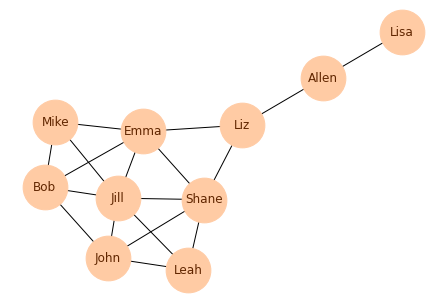

In [39]:
soc_graph = nx.from_edgelist(soc_net)
nx.draw_kamada_kawai(soc_graph, with_labels = True, node_size=2000, node_color = '#ffcba4', font_color = '#612600')
plt.show()

2. Calculate the ff. network characteristics: *(15 points; 5 points each)*
- Diameter
- Density
- Average Degree

### Solution

We can simply use the built-in functions.

In [40]:
diam = nx.diameter(soc_graph)
dens = nx.density(soc_graph)
deg_ave = nx.average_neighbor_degree(soc_graph)

print('The diameter is {}'.format(diam))
print('The density is {}'.format(dens))
pd.DataFrame({'Name': deg_ave.keys(), 'Average Neighbor Degree': deg_ave.values()}).set_index('Name')

The diameter is 4
The density is 0.4


,Average Neighbor Degree
Name,
Lisa,2.0
Allen,2.0
Liz,4.0
Emma,4.2
Shane,4.2
Mike,5.0
Bob,4.5
Jill,4.0
John,4.5


3. Create the degree distribution plot and briefly discuss what it tells us about this social network. *(10 points)*

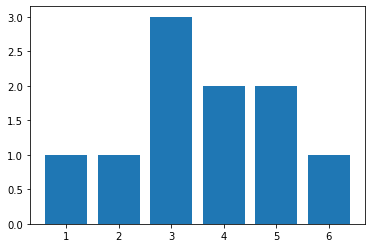

In [41]:
#Make a list containing the degree of each node
degrees = [soc_graph.degree(node) for node in soc_graph.nodes()]
#Make a dictionary with the keys corresponding to the degree and the values corresponding to how often it occured in the degree list
count = {i:len([val for val in degrees if val == i]) for i in np.unique(degrees)}
#Create the bar plot
plt.bar(count.keys(), count.values())
plt.show()

Most of the nodes have 3 connections, following it are 4 and 5 connections. This tells us that this is a highly connected network. However, there are two nodes that are disconnected from the rest (degrees 1 and 2). 

#### PART 2 - Centrality Measures *(30 points)*

Generate a table of centrality measures per node. Columns are:
- Name
- Degree Centrality
- Betweenness Centrality
- Closeness Centrality

Briefly discuss who are the most "central" people in the social network and why.

### Solution

We will use `networkx`'s built-in functions to get the centrality measures.

In [42]:
deg_cent = nx.degree_centrality(soc_graph) #degree centrality
bet_cent = nx.betweenness_centrality(soc_graph) #betweenness centrality
cl_cent = nx.closeness_centrality(soc_graph) #closeness centrality


names = pd.Series(deg_cent.keys(), name='Names') #create a series containing the names (nodes)
cent_table = pd.DataFrame({'Degree Centrality': deg_cent.values(), 'Betweenness Centrality': bet_cent.values(), 'Closeness Centrality': cl_cent.values()}, index = names)
cent_table #create the centrality table whose index is the 'names' series

,Degree Centrality,Betweenness Centrality,Closeness Centrality
Names,,,
Lisa,0.111111,0.000000,0.310345
Allen,0.222222,0.222222,0.428571
Liz,0.333333,0.388889,0.600000
Emma,0.555556,0.231481,0.642857
Shane,0.555556,0.231481,0.642857
Mike,0.333333,0.000000,0.500000
Bob,0.444444,0.023148,0.529412
Jill,0.666667,0.101852,0.600000
John,0.444444,0.023148,0.529412


#### PART 3 - Identify communities *(40 points)*

1. Identify communities in the social network using *(30 points)*:
- Louvain community detection algorithm
- Any other community detection algorithm of your choice

2. Calculate the modularity of the partitions from the two community detection algorithms. *(10 points)*

Briefly describe the algorithm you used and compare the results from the two algorithms.

### Solution

For the Louvain algorithm, we will use the `community_louvain` function from the `community` package.

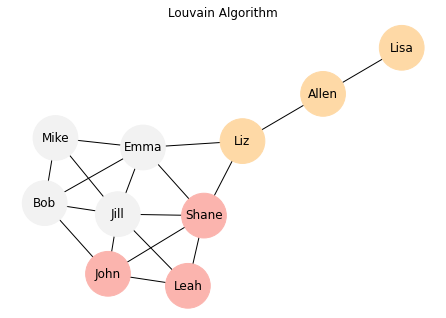

In [43]:
#We will use the Louvain algorithm to assign a number to each node corresponding to what community they belong to
partition = community_louvain.best_partition(soc_graph)
#We will color each node depending on what community they belong to
nx.draw_kamada_kawai(soc_graph, with_labels = True, node_size=2000, cmap='Pastel1', node_color=list(partition.values()))
plt.title('Louvain Algorithm')
plt.show()

In [44]:
#We will sort out the community. We will make a list of sets whose elements contain the individuals in the community
part = [{key for key in partition.keys() if partition[key] == i} for i in range(len((np.unique([elem for elem in partition.values()]))))]
#We will then feed our graph and list of communities on the modularity function
louv_modul = modularity(soc_graph, part)
print('The modularity for the Louvain algorithm is {}'.format(louv_modul))

The modularity for the Louvain algorithm is 0.2222222222222222


We will use the [Clauset-Newman-Moore](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.70.066111) algorithm. It is a predecessor of Louvain, whose attack on the problem is also optimizing the modularity function. Nodes are aggregated in such a way that maximizes the modularity function until we can't increase it further. Being a predecessor, it included inefficiencies that arises from large networks (million nodes) in terms of computation time and errors, according to [Blondel et al](https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008). These problems were already solved by Louvain. Still, let's use it. First, let's group them together

In [45]:
cnm_clus = greedy_modularity_communities(soc_graph)
cnm_clus

[frozenset({'Bob', 'Emma', 'Jill', 'Mike'}),
 frozenset({'Allen', 'Lisa', 'Liz'}),
 frozenset({'John', 'Leah', 'Shane'})]

Next, let's assign numbers to each community.

In [46]:
val_assign = {elem: i for i in range(len(cnm_clus)) for elem in cnm_clus[i]}
#We have to sort the names similar to the automatic arrangement of names by networkx
val_assign = {name: val_assign[name] for name in names}
val_assign

{'Lisa': 1,
 'Allen': 1,
 'Liz': 1,
 'Emma': 0,
 'Shane': 2,
 'Mike': 0,
 'Bob': 0,
 'Jill': 0,
 'John': 2,
 'Leah': 2}

Like what we did earlier, we will color the nodes of the graph depending on the community where it belongs

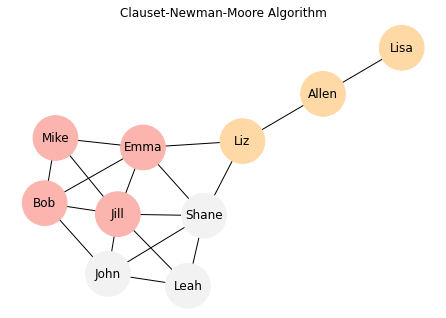

In [47]:
nx.draw_kamada_kawai(soc_graph, with_labels = True, node_size=2000, cmap='Pastel1', node_color=list(val_assign.values()))
plt.title('Clauset-Newman-Moore Algorithm')
plt.show()

In [48]:
#to get the communities for CNM, we just unpack the frozenset of greed_clus
cnm_comms =  [{elem for elem in cnm_clus[i]} for i in range(len(cnm_clus))]
#calculate the modularity
cnm_modul = modularity(soc_graph, cnm_comms)
print('The modularity for the Clauset-Newman-Moore algorithm is {}'.format(cnm_modul))

The modularity for the Clauset-Newman-Moore algorithm is 0.22222222222222218


Because CNM is the predecessor of the Louvain algorithm, it is expected that both will give the same results. The difference might be amplified in the regime where CNM fails.